In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1. Load data
df = pd.read_csv('../data/viviendas.csv')

# 2. Metric conversion and Cleanup
conversion_factor = 0.092903
df['area_m2'] = df['area'] * conversion_factor

# Transformamos todas las variables de texto clave a números
df['airconditioning_num'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['mainroad_num'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom_num'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement_num'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating_num'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})

# 3. Features selection (AQUÍ agregamos las nuevas columnas)
# Incluimos 'parking' que ya era un número en el CSV original
X = df[['area_m2', 'bedrooms', 'bathrooms', 'airconditioning_num', 
        'mainroad_num', 'guestroom_num', 'basement_num', 'hotwaterheating_num', 'parking']]
y = df['price']

print(f"Datos listos. Ahora usamos {X.shape[1]} características para entrenar.")

Datos listos. Ahora usamos 9 características para entrenar.


In [10]:
# 4. Splitting the data
# Usaremos el 80% para entrenar y el 20% para la prueba final
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Entrenaremos con {len(X_train)} casas y probaremos con {len(X_test)}")

Entrenaremos con 436 casas y probaremos con 109


In [11]:
# 5. Model Initialization
model = LinearRegression()

# 6. Training (Ajuste del modelo)
model.fit(X_train, y_train)

print("¡Modelo entrenado con éxito!")

¡Modelo entrenado con éxito!


In [12]:
# 7. Scoring
score = model.score(X_test, y_test)
print(f"El modelo tiene una precisión (R^2) de: {score:.2%}")

El modelo tiene una precisión (R^2) de: 58.67%


In [13]:
# 8. Real-world prediction (Actualizada con 9 variables)
# Formato: [area_m2, bed, bath, airco, road, guest, base, hotwater, park]
datos_nueva_casa = pd.DataFrame([[100, 3, 2, 1, 1, 0, 1, 0, 2]], 
                                columns=X.columns) # Esto usa automáticamente los nombres correctos

prediccion = model.predict(datos_nueva_casa)
print(f"El nuevo precio estimado es: ${prediccion[0]:,.2f}")

El nuevo precio estimado es: $5,809,230.54


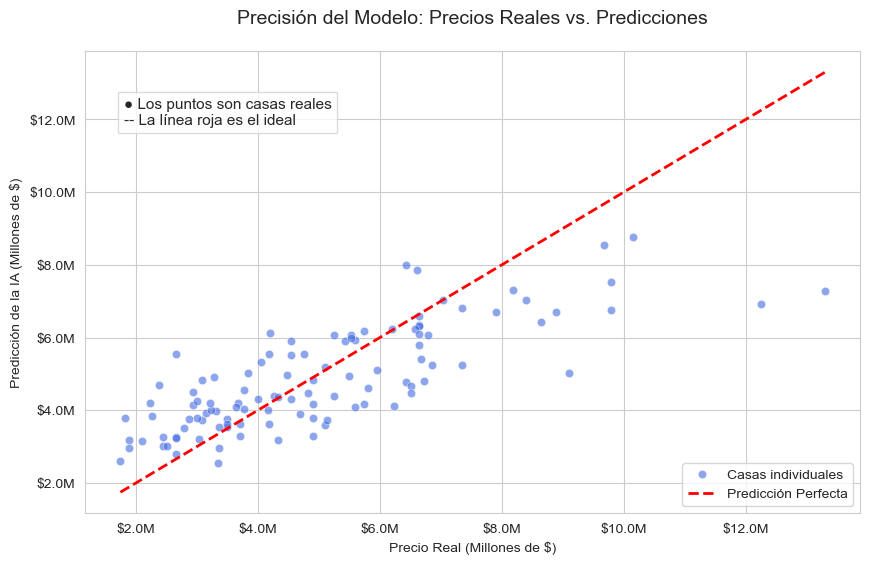

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# 9. Visualización de resultados optimizada
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Gráfico de dispersión
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='royalblue', label='Casas individuales')

# Línea de predicción perfecta
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         '--r', linewidth=2, label='Predicción Perfecta')

# Formatear ejes a Millones (M)
formatter = ticker.FuncFormatter(lambda x, pos: f'${x/1e6:.1f}M')
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# ARREGLO DEL TEXTO: Usamos transform=plt.gca().transAxes 
# para que (0.05, 0.9) signifique "5% del ancho y 90% del alto"
plt.text(0.05, 0.90, 
         '● Los puntos son casas reales\n-- La línea roja es el ideal', 
         fontsize=11, 
         transform=plt.gca().transAxes,  # <--- Esto evita que se corte
         verticalalignment='top',
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='lightgray'))

plt.xlabel('Precio Real (Millones de $)')
plt.ylabel('Predicción de la IA (Millones de $)')
plt.title('Precisión del Modelo: Precios Reales vs. Predicciones', fontsize=14, pad=20)
plt.legend(loc='lower right') # Movimos la leyenda abajo para que no estorbe
plt.savefig('grafico_resultados.png', bbox_inches='tight', dpi=300)
plt.show()


In [20]:
import joblib

# 10. Guardar el modelo y las columnas
# Esto crea archivos físicos en tu carpeta 'models'
joblib.dump(model, '../models/house_price_model.pkl')
joblib.dump(X.columns.tolist(), '../models/model_columns.pkl')

print("¡IA exportada con éxito en la carpeta /models/!")

¡IA exportada con éxito en la carpeta /models/!
